# **GRADED CHALLENGE 1:**

---



## **I. Perkenalan**

---



Nama : Muhammad Farhan Darmawan

---

Batch : 019

**Berikut merupakan syntax untuk memanggil dataset covid19 di Bigquery Google Cloud :**

---



SELECT * FROM  `bigquery-public-data.covid19_jhu_csse_eu.summary` 

**DATASET DESCRIPTION COVID19**

Data ini merupakan data covid19 yang ada dari 252 Negara yang terdiri dari beberapa .keys() diantaranya :


*   `province_state` : Nama provinsi
*   `country_region` : Nama negara
*   `date` : Tanggal 
*   `latitude` : Titik koordinat sumbu Y
*   `longitude` : Titik koordinat sumbu X
*   `location_geom` :Titik lokasi geometri
*   `confirmed` : Jumlah data yang positif terkena covid19
*   `deaths` : Jumlah data yang meninggal akibat covid19
*   `recovered` : Jumlah data yang sembuh dari covid19
*   `active` : Jumlah selisih dari data 'confirmed' dan 'deaths'
*   `fips` : Kode *Federal Information Processing Standards*
*   `admin2` : Nama distrik
*   `combine_key` : Gabungan nama distrik, provinsi, negara














## **II. Import Library**

---



In [1]:
# import library yang digunakan

import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import io

**Import file dari google drive**

---



In [2]:
# import file dari google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **III. Data Loading**

### Load data CSV dari google drive

In [3]:
df = pd.read_csv('/content/drive/MyDrive/bq-results-20230401-005207-1680314916881/h8dsft_P0GC1_Muhammad Farhan Darmawan.csv')

### Informasi sederhana data frame

In [4]:
# Menampilkan 15 data teratas
df.head(15) 

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,South Dakota,US,2020-05-15,43.206601,-98.588562,POINT(-98.58856175 43.20660134),8.0,0.0,0.0,8.0,46023.0,Charles Mix,"Charles Mix, South Dakota, US"
1,Michigan,US,2020-05-15,45.377900,-85.196141,POINT(-85.19614053 45.37790017),13.0,1.0,0.0,12.0,26029.0,Charlevoix,"Charlevoix, Michigan, US"
2,Virginia,US,2020-05-15,38.035279,-78.485696,POINT(-78.48569588 38.03527919),71.0,2.0,0.0,69.0,51540.0,Charlottesville,"Charlottesville, Virginia, US"
3,Georgia,US,2020-05-15,32.000430,-81.124895,POINT(-81.12489526 32.00043026),353.0,14.0,0.0,339.0,13051.0,Chatham,"Chatham, Georgia, US"
4,Tennessee,US,2020-05-15,36.261362,-87.089036,POINT(-87.08903581 36.26136216),88.0,0.0,0.0,88.0,47021.0,Cheatham,"Cheatham, Tennessee, US"
5,Oklahoma,US,2020-05-15,35.906928,-94.999809,POINT(-94.99980896 35.90692775),29.0,1.0,0.0,28.0,40021.0,Cherokee,"Cherokee, Oklahoma, US"
6,South Carolina,US,2020-05-15,35.051223,-81.618286,POINT(-81.61828622 35.05122251),23.0,1.0,0.0,22.0,45021.0,Cherokee,"Cherokee, South Carolina, US"
7,Iowa,US,2020-05-15,43.060013,-92.317733,POINT(-92.31773347 43.06001295),7.0,0.0,0.0,7.0,19037.0,Chickasaw,"Chickasaw, Iowa, US"
8,Mississippi,US,2020-05-15,33.919832,-88.948155,POINT(-88.9481545 33.91983202),114.0,11.0,0.0,103.0,28017.0,Chickasaw,"Chickasaw, Mississippi, US"
9,Illinois,US,2020-05-15,39.545816,-89.277805,POINT(-89.27780482 39.54581621),30.0,4.0,0.0,26.0,17021.0,Christian,"Christian, Illinois, US"


In [5]:
# Menampilkan 10 data terbawah
df.tail(10) 

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
4264070,West Virginia,US,2022-09-29,38.994725,-80.499882,POINT(-80.49988181 38.9947249),6640.0,93.0,NaN,NaN,54041.0,Lewis,"Lewis, West Virginia, US"
4264071,West Virginia,US,2022-09-29,37.829989,-81.935286,POINT(-81.93528571 37.8299889),12055.0,195.0,NaN,NaN,54045.0,Logan,"Logan, West Virginia, US"
4264072,West Virginia,US,2022-09-29,37.404812,-81.110231,POINT(-81.11023142 37.40481169),21698.0,280.0,NaN,NaN,54055.0,Mercer,"Mercer, West Virginia, US"
4264073,West Virginia,US,2022-09-29,38.327587,-80.009938,POINT(-80.00993811 38.32758728),2370.0,34.0,NaN,NaN,54075.0,Pocahontas,"Pocahontas, West Virginia, US"
4264074,West Virginia,US,2022-09-29,39.112409,-79.570536,POINT(-79.57053576 39.11240885),2281.0,38.0,NaN,NaN,54093.0,Tucker,"Tucker, West Virginia, US"
4264075,Wisconsin,US,2022-09-29,44.945628,-91.896248,POINT(-91.8962481 44.94562799),14817.0,77.0,NaN,NaN,55033.0,Dunn,"Dunn, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,43.800260,-89.046796,POINT(-89.04679553 43.80025981),5898.0,66.0,NaN,NaN,55047.0,Green Lake,"Green Lake, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,43.924570,-90.111202,POINT(-90.11120239 43.92456975),8846.0,72.0,NaN,NaN,55057.0,Juneau,"Juneau, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,45.385534,-88.033246,POINT(-88.033246 45.38553432),13376.0,138.0,NaN,NaN,55075.0,Marinette,"Marinette, Wisconsin, US"
4264079,Wisconsin,US,2022-09-29,45.004225,-88.709507,POINT(-88.70950714 45.00422544),2211.0,15.0,NaN,NaN,55078.0,Menominee,"Menominee, Wisconsin, US"


In [6]:
# Menampilkan nama kolom, jumlah kolom, dan tipe jenis data pada masing masing kolom
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4264080 entries, 0 to 4264079
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   latitude        float64
 4   longitude       float64
 5   location_geom   object 
 6   confirmed       float64
 7   deaths          float64
 8   recovered       float64
 9   active          float64
 10  fips            float64
 11  admin2          object 
 12  combined_key    object 
dtypes: float64(7), object(6)
memory usage: 422.9+ MB


In [7]:
# Menampilkan jumlah baris dan kolom dari data frame
df.shape 

(4264080, 13)

In [8]:
# Menghitung perhitungan statistika pada kolom dengan jenis tipe data int atau float
df.describe() 

,latitude,longitude,confirmed,deaths,recovered,active,fips
count,4.168817e+06,4.168817e+06,4.264061e+06,4.263638e+06,1.435591e+06,1.427512e+06,3.499492e+06
mean,3.590688e+01,-7.203787e+01,7.424153e+04,1.026421e+03,1.636175e+04,6.556527e+03,3.228783e+04
std,1.305595e+01,5.386805e+01,5.864612e+05,6.351388e+03,1.341763e+05,9.286123e+04,1.793271e+04
min,-7.194990e+01,-1.781165e+02,-3.028440e+05,-1.780000e+02,-8.544050e+05,-6.298082e+06,6.000000e+01
25%,3.326679e+01,-9.657264e+01,8.010000e+02,1.100000e+01,0.000000e+00,5.500000e+01,1.904100e+04
50%,3.793358e+01,-8.686492e+01,3.741000e+03,5.800000e+01,0.000000e+00,4.710000e+02,3.005700e+04
75%,4.213891e+01,-7.765540e+01,1.606500e+04,2.230000e+02,0.000000e+00,2.248000e+03,4.702900e+04
max,7.200000e+01,1.780650e+02,3.861851e+07,6.246410e+05,6.399531e+06,1.087776e+07,9.999900e+04


In [9]:
# Menampilkan nilai tahun paling awal dari kolom date
df['date'].min()

'2020-01-22'

In [10]:
# Menampilkan nilai tahun terkini dari kolom date
df['date'].max()

'2023-03-09'

*Diketahui bahwa dataset* `covid19` *ini merupakan data dari* `Januari tahun 2020` *sampai* `September tahun 2023`

In [11]:
# Mengetahui jumlah nilai null (kosong) pada masing masing kolom
df.isnull().sum() 

province_state     191891
country_region          1
date                    0
latitude            95263
longitude           95263
location_geom       95263
confirmed              19
deaths                442
recovered         2828489
active            2836568
fips               764588
admin2             759505
combined_key         7618
dtype: int64

*Dari data null diatas diketahui bahwa kolom `province_state`, `recovered`, `active`, `fips`, `admin2` memiliki nilai null yang cukup tinggi sehingga diperlukannya data manipulating agak isi dari dataset diatas dapat dipresentasikan*

## **IV. Data Cleaning**

In [12]:
# Menyalin data frame yang sudah ada sehingga saat dilakukan cleansing atau manipulasi, raw data dari data frame sebelumnya masih ada
covid = df.copy() 

### **Data cleaning menggunakan .fillna()**

In [13]:
# Mengetahui jumlah nilai null (kosong) pada masing masing kolom sebelum dilakukan manipulasi dengan .fillna()
covid.isnull().sum() 

province_state     191891
country_region          1
date                    0
latitude            95263
longitude           95263
location_geom       95263
confirmed              19
deaths                442
recovered         2828489
active            2836568
fips               764588
admin2             759505
combined_key         7618
dtype: int64

*Dengan adanya nilai null pada kolom* `admin2`, `province_state`, `country_region`, *dan* `combined_key`, *maka saya gunakan* `.fillna()` *untuk mengisi nilai null tersebut*

Selain itu, untuk kolom `recovered` diasumsikan bahwa nilai `null = 0` dan kolom `active` menggunakan selisih dari `confirmed - deaths` menggunakan `.fillna()`

In [14]:
# Mengganti nilai null pada kolom admin2 yang diisi dengan kolom province_state
covid['admin2'].fillna(covid['country_region'], inplace=True) 

# Mengganti nilai null pada kolom province_state yang diisi dengan kolom country_region
covid['province_state'].fillna(covid['country_region'], inplace=True)

# Mengganti nilai null pada kolom country_region yang diisi dengan kolom province_state
covid['country_region'].fillna(covid['province_state'], inplace=True)

# Mengganti nilai null pada kolom combined_key
covid['combined_key'].fillna(covid['admin2'] + ',' + covid['province_state'] + ',' + covid['country_region'], inplace=True)

# Mengganti nilai null pada kolom recovered
covid['recovered'].fillna(value=0, inplace=True)

# Mengganti nilai null pada kolom active
covid['active'].fillna(covid['confirmed'] - covid['deaths'], inplace=True)

In [15]:
# Mengetahui jumlah nilai null (kosong) pada masing masing kolom yang sudah di manipulasi menggunakan .fillna()
covid.isnull().sum() 

province_state         1
country_region         1
date                   0
latitude           95263
longitude          95263
location_geom      95263
confirmed             19
deaths               442
recovered              0
active               441
fips              764588
admin2                 1
combined_key           1
dtype: int64

### **Data cleaning menggunakan .dropna()**

In [16]:
# Mengetahui jumlah nilai null (kosong) pada masing masing kolom sebelum dilakukan manipulasi dengan .dropna()
covid.isnull().sum()

province_state         1
country_region         1
date                   0
latitude           95263
longitude          95263
location_geom      95263
confirmed             19
deaths               442
recovered              0
active               441
fips              764588
admin2                 1
combined_key           1
dtype: int64

*Pada kolom* `province_state`, `country_region`, `confirmed`, `deaths`, `active`, `admin2`, `combined_key` *dikarenakan nilai* `null` *cukup kecil, maka saya gunakan* `.dropna()` *sehingga data dengan nilai* `null` *dapat diwakilkan oleh data yang lain*

In [17]:
# Menghapus nilai null pada kolom confirmed dan kolom deaths menggunakan .dropna()
covid.dropna(subset=['province_state', 'country_region', 'confirmed', 'deaths', 'active', 'admin2', 'combined_key'], inplace=True)

In [18]:
# Mengetahui jumlah nilai null (kosong) pada masing masing kolom sesudah dilakukan manipulasi dengan .dropna()
covid.isnull().sum()

province_state         0
country_region         0
date                   0
latitude           94820
longitude          94820
location_geom      94820
confirmed              0
deaths                 0
recovered              0
active                 0
fips              764145
admin2                 0
combined_key           0
dtype: int64

### **Data cleaning menggunakan .drop()**

*Dikarenakan koordinat dan fips tidak akan saya gunakan dalam proses ekplorisasi data, maka saya menghapus* `kolom koordinat` *dan* `fips` *agar data frame* `covid19` *lebih sederhana*

In [19]:
# Menggabungkan 3 kolom koordinat menjadi 1 
coordinate_columns = ['latitude','longitude','location_geom'] 

In [20]:
# Menghapus kolom yang tidak diperlukan
# Kolom Koordinat
covid.drop(coordinate_columns, inplace= True, axis = 1)

#Kolom fips
covid.drop(['fips'], inplace=True, axis=1)

#
covid.drop(covid[covid['active'] < 0].index, inplace = True)

In [21]:
# Menampilkan jumlah baris dan kolom dari data frame yang telah dilakukan .drop()
covid.shape 

(4252592, 9)

In [22]:
# Menampilkan nama kolom, jumlah kolom, dan tipe jenis data pada masing masing kolom yang telah dilakukan .drop()
covid.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4252592 entries, 0 to 4264079
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country_region  object 
 2   date            object 
 3   confirmed       float64
 4   deaths          float64
 5   recovered       float64
 6   active          float64
 7   admin2          object 
 8   combined_key    object 
dtypes: float64(4), object(5)
memory usage: 324.4+ MB


### **Merubah nama kolom menggunakan .rename()**

In [23]:
# Merubah nama kolom
covid = covid.rename(columns={'country_region' : 'country', 'admin2' : 'district'})

covid.head()

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
0,South Dakota,US,2020-05-15,8.0,0.0,0.0,8.0,Charles Mix,"Charles Mix, South Dakota, US"
1,Michigan,US,2020-05-15,13.0,1.0,0.0,12.0,Charlevoix,"Charlevoix, Michigan, US"
2,Virginia,US,2020-05-15,71.0,2.0,0.0,69.0,Charlottesville,"Charlottesville, Virginia, US"
3,Georgia,US,2020-05-15,353.0,14.0,0.0,339.0,Chatham,"Chatham, Georgia, US"
4,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0,Cheatham,"Cheatham, Tennessee, US"


## **V. Explorasi Data**

In [24]:
# Menampilkan 5 data teratas
covid.head()

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
0,South Dakota,US,2020-05-15,8.0,0.0,0.0,8.0,Charles Mix,"Charles Mix, South Dakota, US"
1,Michigan,US,2020-05-15,13.0,1.0,0.0,12.0,Charlevoix,"Charlevoix, Michigan, US"
2,Virginia,US,2020-05-15,71.0,2.0,0.0,69.0,Charlottesville,"Charlottesville, Virginia, US"
3,Georgia,US,2020-05-15,353.0,14.0,0.0,339.0,Chatham,"Chatham, Georgia, US"
4,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0,Cheatham,"Cheatham, Tennessee, US"


In [25]:
# Menampilkan 5 data terbawah
covid.tail()

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
4264075,Wisconsin,US,2022-09-29,14817.0,77.0,0.0,14740.0,Dunn,"Dunn, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,5898.0,66.0,0.0,5832.0,Green Lake,"Green Lake, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,8846.0,72.0,0.0,8774.0,Juneau,"Juneau, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,13376.0,138.0,0.0,13238.0,Marinette,"Marinette, Wisconsin, US"
4264079,Wisconsin,US,2022-09-29,2211.0,15.0,0.0,2196.0,Menominee,"Menominee, Wisconsin, US"


### **Querying**

In [26]:
# Menampilkan seluruh dataframe
covid

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
0,South Dakota,US,2020-05-15,8.0,0.0,0.0,8.0,Charles Mix,"Charles Mix, South Dakota, US"
1,Michigan,US,2020-05-15,13.0,1.0,0.0,12.0,Charlevoix,"Charlevoix, Michigan, US"
2,Virginia,US,2020-05-15,71.0,2.0,0.0,69.0,Charlottesville,"Charlottesville, Virginia, US"
3,Georgia,US,2020-05-15,353.0,14.0,0.0,339.0,Chatham,"Chatham, Georgia, US"
4,Tennessee,US,2020-05-15,88.0,0.0,0.0,88.0,Cheatham,"Cheatham, Tennessee, US"
...,...,...,...,...,...,...,...,...,...
4264075,Wisconsin,US,2022-09-29,14817.0,77.0,0.0,14740.0,Dunn,"Dunn, Wisconsin, US"
4264076,Wisconsin,US,2022-09-29,5898.0,66.0,0.0,5832.0,Green Lake,"Green Lake, Wisconsin, US"
4264077,Wisconsin,US,2022-09-29,8846.0,72.0,0.0,8774.0,Juneau,"Juneau, Wisconsin, US"
4264078,Wisconsin,US,2022-09-29,13376.0,138.0,0.0,13238.0,Marinette,"Marinette, Wisconsin, US"


In [27]:
# # Menampilkan nama kolom, jumlah kolom, dan tipe jenis data pada masing masing kolom
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4252592 entries, 0 to 4264079
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   province_state  object 
 1   country         object 
 2   date            object 
 3   confirmed       float64
 4   deaths          float64
 5   recovered       float64
 6   active          float64
 7   district        object 
 8   combined_key    object 
dtypes: float64(4), object(5)
memory usage: 324.4+ MB


In [28]:
# Merubah kolom date dari tipe object (str) menjadi tipe date
covid["date"] = pd.to_datetime(covid["date"], format= "%Y/%m/%d" )

In [29]:
# Menampilkan nama kolom, jumlah kolom, dan tipe jenis data pada masing masing kolom
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4252592 entries, 0 to 4264079
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   province_state  object        
 1   country         object        
 2   date            datetime64[ns]
 3   confirmed       float64       
 4   deaths          float64       
 5   recovered       float64       
 6   active          float64       
 7   district        object        
 8   combined_key    object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 324.4+ MB


In [30]:
covid['country'].unique()

array(['US', 'Italy', 'Germany', 'Canada', 'United Kingdom', 'France',
       'Spain', 'China', 'Netherlands', 'Australia', 'Angola',
       'Bangladesh', 'Brunei', 'Bulgaria', 'Central African Republic',
       'Chile', 'Colombia', "Cote d'Ivoire", 'Croatia', 'Denmark',
       'El Salvador', 'Georgia', 'Ghana', 'Grenada', 'Guinea', 'Iran',
       'Ireland', 'Japan', 'Laos', 'Luxembourg', 'MS Zaandam', 'Malawi',
       'Mozambique', 'Nigeria', 'Norway', 'Portugal', 'Saint Lucia',
       'Senegal', 'Somalia', 'Switzerland', 'Syria', 'Taiwan*',
       'Thailand', 'Tunisia', 'Uzbekistan', 'Yemen', 'Albania', 'Andorra',
       'Antarctica', 'Argentina', 'Azerbaijan', 'Bahrain', 'Belgium',
       'Brazil', 'Burkina Faso', 'Cabo Verde', 'Cameroon', 'Chad',
       'Comoros', 'Congo (Brazzaville)', 'Djibouti', 'Greece', 'Guyana',
       'India', 'Jordan', 'Latvia', 'Liberia', 'Liechtenstein',
       'Madagascar', 'Malaysia', 'Mexico', 'Morocco', 'Oman', 'Peru',
       'Russia', 'Saint Vincent 

In [31]:
# Menampilkan 10 data teratas dari data covid di Indonesia saat pertama kali muncul dan jumlah orang terkonfirmasi
covid.query("date < 2022 & \
            country == 'Indonesia' & \
            confirmed > 0").sort_values(['confirmed', 'date'], ascending=True).head(10)

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
489294,Indonesia,Indonesia,2020-03-02,2.0,0.0,0.0,2.0,Indonesia,"Indonesia,Indonesia,Indonesia"
1734909,Indonesia,Indonesia,2020-03-03,2.0,0.0,0.0,2.0,Indonesia,"Indonesia,Indonesia,Indonesia"
1823602,Indonesia,Indonesia,2020-03-04,2.0,0.0,0.0,2.0,Indonesia,"Indonesia,Indonesia,Indonesia"
4233574,Indonesia,Indonesia,2020-03-05,2.0,0.0,0.0,2.0,Indonesia,"Indonesia,Indonesia,Indonesia"
1863650,Indonesia,Indonesia,2020-03-06,4.0,0.0,0.0,4.0,Indonesia,"Indonesia,Indonesia,Indonesia"
3513381,Indonesia,Indonesia,2020-03-07,4.0,0.0,0.0,4.0,Indonesia,"Indonesia,Indonesia,Indonesia"
624596,Indonesia,Indonesia,2020-03-08,6.0,0.0,0.0,6.0,Indonesia,"Indonesia,Indonesia,Indonesia"
1617341,Indonesia,Indonesia,2020-03-09,19.0,0.0,0.0,19.0,Indonesia,"Indonesia,Indonesia,Indonesia"
1277582,Indonesia,Indonesia,2020-03-10,27.0,0.0,2.0,27.0,Indonesia,"Indonesia,Indonesia,Indonesia"
517901,Indonesia,Indonesia,2020-03-11,34.0,1.0,2.0,33.0,Indonesia,"Indonesia,Indonesia,Indonesia"


In [32]:
# Menampilkan 10 data teratas dari data covid di Indonesia di akhir tahun 2022 dengan jumlah akumulasi orang terkonfirmasi
covid.query("date < 2022 & \
            country == 'Indonesia' & \
            confirmed > 0").sort_values(['confirmed', 'date'], ascending=False).head(10)

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
2797434,Indonesia,Indonesia,2021-12-31,4262720.0,144094.0,0.0,4118626.0,Indonesia,Indonesia
3943427,Indonesia,Indonesia,2021-12-30,4262540.0,144088.0,0.0,4118452.0,Indonesia,Indonesia
4093766,Indonesia,Indonesia,2021-12-29,4262351.0,144081.0,0.0,4118270.0,Indonesia,Indonesia
3548046,Indonesia,Indonesia,2021-12-28,4262157.0,144071.0,0.0,4118086.0,Indonesia,Indonesia
2266872,Indonesia,Indonesia,2021-12-27,4261879.0,144063.0,0.0,4117816.0,Indonesia,Indonesia
3578160,Indonesia,Indonesia,2021-12-26,4261667.0,144053.0,0.0,4117614.0,Indonesia,Indonesia
1392004,Indonesia,Indonesia,2021-12-25,4261667.0,144053.0,0.0,4117614.0,Indonesia,Indonesia
543693,Indonesia,Indonesia,2021-12-24,4261412.0,144047.0,0.0,4117365.0,Indonesia,Indonesia
3001717,Indonesia,Indonesia,2021-12-23,4261208.0,144042.0,0.0,4117166.0,Indonesia,Indonesia
426104,Indonesia,Indonesia,2021-12-22,4261072.0,144034.0,0.0,4117038.0,Indonesia,Indonesia


*Dari data diatas dapat diketahui bahwa* `covid19` *muncul di* `Indonesia` *pada awal Bulan Maret tahun 2020 dengan jumlah kasus pertama yakni* `2 orang`*. Hingga akhir tahun 2021 jumlah kasus di* `Indonesia` *telah mencapai* `4.262.720 orang` *dengan jumlah kematian* `144.094 orang` 

In [33]:
# Menampilkan 50 data teratas dari data covid di seluruh dunia di akhir tahun 2022 dengan jumlah akumulasi orang terkonfirmasi
covid.query("date < 2022 & \
            confirmed > 0").sort_values(['confirmed', 'date'], ascending=False).head(50)

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
2619472,England,United Kingdom,2021-12-31,10988851.0,129219.0,0.0,10859632.0,United Kingdom,"England, United Kingdom"
3944033,England,United Kingdom,2021-12-30,10828575.0,129041.0,0.0,10699534.0,United Kingdom,"England, United Kingdom"
2614560,England,United Kingdom,2021-12-29,10683026.0,128724.0,0.0,10554302.0,United Kingdom,"England, United Kingdom"
3548655,England,United Kingdom,2021-12-28,10545584.0,128686.0,0.0,10416898.0,United Kingdom,"England, United Kingdom"
3272102,England,United Kingdom,2021-12-27,10429274.0,128671.0,0.0,10300603.0,United Kingdom,"England, United Kingdom"
2689776,England,United Kingdom,2021-12-26,10115910.0,128528.0,0.0,9987382.0,United Kingdom,"England, United Kingdom"
978261,England,United Kingdom,2021-12-25,10115910.0,128528.0,0.0,9987382.0,United Kingdom,"England, United Kingdom"
544375,England,United Kingdom,2021-12-24,10115910.0,128528.0,0.0,9987382.0,United Kingdom,"England, United Kingdom"
3002323,England,United Kingdom,2021-12-23,10011650.0,128414.0,0.0,9883236.0,United Kingdom,"England, United Kingdom"
426747,England,United Kingdom,2021-12-22,9905451.0,128289.0,0.0,9777162.0,United Kingdom,"England, United Kingdom"


*Dari data diatas dapat diketahui bahwa jumlah kasus* `covid19` *tertinggi terjadi di Negara* `UK` *dengan jumlah kasus* `10.988.851 orang`*, disusul oleh Negara* `Prancis` *dengan jumlah kasus* `9.761.814 orang`*, dan Negara* `Turki` *dengan jumlah kasus* `9.484.520 orang` *di akhir tahun 2021*

In [34]:
# Menampilkan 50 data teratas dari data covid di seluruh dunia ditinjau dari nilai recovered tertinggi
covid.query("date < 2022 & \
            recovered > 0").sort_values(['recovered', 'date'], ascending=False).head(50)

,province_state,country,date,confirmed,deaths,recovered,active,district,combined_key
2643454,Recovered,US,2020-12-14,0.0,0.0,6399531.0,0.0,US,"Recovered, US"
1847532,Maharashtra,India,2021-08-04,6327194.0,133410.0,6117560.0,76224.0,India,"Maharashtra, India"
2047808,Maharashtra,India,2021-08-03,6321068.0,133215.0,6110124.0,77729.0,India,"Maharashtra, India"
1293603,Maharashtra,India,2021-08-02,6315063.0,133038.0,6103325.0,78700.0,India,"Maharashtra, India"
3168211,Maharashtra,India,2021-08-01,6310194.0,132948.0,6094896.0,82350.0,India,"Maharashtra, India"
4168379,Maharashtra,India,2021-07-31,6303715.0,132791.0,6090786.0,80138.0,India,"Maharashtra, India"
1381847,Maharashtra,India,2021-07-30,6296756.0,132566.0,6083319.0,80871.0,India,"Maharashtra, India"
63865,Maharashtra,India,2021-07-29,6290156.0,132335.0,6075888.0,81933.0,India,"Maharashtra, India"
2433001,Maharashtra,India,2021-07-28,6282914.0,132145.0,6064856.0,85913.0,India,"Maharashtra, India"
1054154,Maharashtra,India,2021-07-27,6276057.0,131859.0,6058751.0,85447.0,India,"Maharashtra, India"


*Dari data diatas dapat diketahui bahwa jumlah kasus sembuh dari* `covid19` *tertinggi yaitu di* `US` *dan disusul oleh* `India`*, Negara* `US` *memiliki penanganan* `covid19` *paling singkat yakni pada akhir tahun 2020 sedangkan di* `India` *pada pertengahan semester 2 tahun 2021*

### **Grouping & Aggregating**

In [35]:
# Menambahkan kolom baru berupa year pada dataframe covid
covid['year'] = covid['date'].dt.year

covid['year']

0          2020
1          2020
2          2020
3          2020
4          2020
           ... 
4264075    2022
4264076    2022
4264077    2022
4264078    2022
4264079    2022
Name: year, Length: 4252592, dtype: int64

In [36]:
# Menampilkan data jumlah kasus terbanyak dari tahun 2020 - 2022 di Singapura
covid[
      (covid['country'] == 'Singapore') &
      (covid['year'] < 2023)].groupby(['year','combined_key'])['confirmed', 'deaths', 'recovered'].max()

<ipython-input-36-9a8da08ba7a9>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid[


confirmed  deaths  recovered
year combined_key                                               
2020 Singapore                        58599.0    29.0    58449.0
     Singapore,Singapore,Singapore      432.0     2.0      140.0
2021 Singapore                       279405.0   828.0    63357.0
2022 Singapore                      2202214.0  1711.0        0.0

In [37]:
# Menampilkan data jumlah kasus terbanyak dari tahun 2020 - 2022 di Thailand
covid[
      (covid['country'] == 'Thailand') &
      (covid['year'] < 2023)].groupby(['year','combined_key'])['confirmed', 'deaths', 'recovered'].max()

<ipython-input-37-c9c0874d1941>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid[


confirmed   deaths  recovered
year combined_key                                             
2020 Thailand                       7163.0     63.0     4273.0
     Thailand,Thailand,Thailand      411.0      1.0       42.0
2021 Thailand                    2223435.0  21698.0    26873.0
2022 Thailand                    4721808.0  33594.0        0.0

In [38]:
# Menampilkan data jumlah kasus terbanyak dari tahun 2020 - 2022 di Timor-Leste
covid[
      (covid['country'] == 'Timor-Leste') &
      (covid['year'] < 2023)].groupby(['year','combined_key'])['confirmed', 'deaths', 'recovered'].max()

<ipython-input-38-9ca6d3a0e661>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid[


,,confirmed,deaths,recovered
year,combined_key,,,
2020,Timor-Leste,44.0,0.0,32.0
2021,Timor-Leste,19837.0,122.0,10025.0
2022,Timor-Leste,23386.0,138.0,0.0


*Dari ketiga data diatas dapat diketahui bahwa pada tahun 2020 - 2022 jumlah kasus `covid19` dan kematian tertinggi berada di Negara* `Thailand`, sedangkan jumlah kasus sembuh tertinggi berada di Negara `Singapura`

In [39]:
# Menampilkan frekuensi laporan kasus covid di Negara Jerman
covid[
      (covid['year']  == 2021) &
      (covid['country'] == 'Germany')
].groupby(['year', 'country'])['province_state'].value_counts()

year  country  province_state        
2021  Germany  Baden-Wurttemberg         365
               Bayern                    365
               Berlin                    365
               Brandenburg               365
               Bremen                    365
               Hamburg                   365
               Hessen                    365
               Mecklenburg-Vorpommern    365
               Niedersachsen             365
               Nordrhein-Westfalen       365
               Rheinland-Pfalz           365
               Saarland                  365
               Sachsen                   365
               Sachsen-Anhalt            365
               Schleswig-Holstein        365
               Thuringen                 365
               Unknown                   365
Name: province_state, dtype: int64

*Dari data diatas diketahui bahwa seluruh* `province_state` *di Negara Jerman, setiap hari melaporkan adanya kasus* `covid19 `

In [40]:
# Menampilkan data laporan kasus covid di Negara Jerman
covid_germany = covid[
                      (covid['year']  == 2021) &
                      (covid['country'] == 'Germany')
                ].groupby(['year', 'country', 'province_state'])['confirmed', 'deaths', 'recovered'].max()

covid_germany

<ipython-input-40-6ccb2cb533f2>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_germany = covid[


confirmed   deaths  recovered
year country province_state                                       
2021 Germany Baden-Wurttemberg       1021855.0  13014.0   493200.0
             Bayern                  1331261.0  19701.0   635200.0
             Berlin                   331233.0   4016.0   178200.0
             Brandenburg              244380.0   4682.0   105200.0
             Bremen                    48483.0    600.0    27180.0
             Hamburg                  141452.0   1995.0    76500.0
             Hessen                   481831.0   8564.0   285600.0
             Mecklenburg-Vorpommern   101242.0   1476.0    43000.0
             Niedersachsen            443516.0   6826.0   257500.0
             Nordrhein-Westfalen     1386725.0  20331.0   804900.0
             Rheinland-Pfalz          279700.0   4638.0   152600.0
             Saarland                  74409.0   1247.0    40890.0
             Sachsen                  653979.0  12973.0   276000.0
             Sachsen-Anhalt           225963.0   4277.0    96010.0
             Schleswig-Holstein       120034.0   1885.0    62890.0
             Thuringen                290772.0   5886.0   124600.0
             Unknown                   21852.0      0.0        0.0

In [41]:
# Menampilkan nilai maximum dari dataframe covid_germany
covid_germany.max()

confirmed    1386725.0
deaths         20331.0
recovered     804900.0
dtype: float64

*Dari data* `covid19` *di Negara* `Germany` *diketahui bahwa jumlah kasus tertinggi selama tahun 2021 berada pada provinsi* `Nordrhein-Westfalen`

### **Data Visualizations**

In [42]:
%matplotlib inline

<Axes: xlabel='date'>

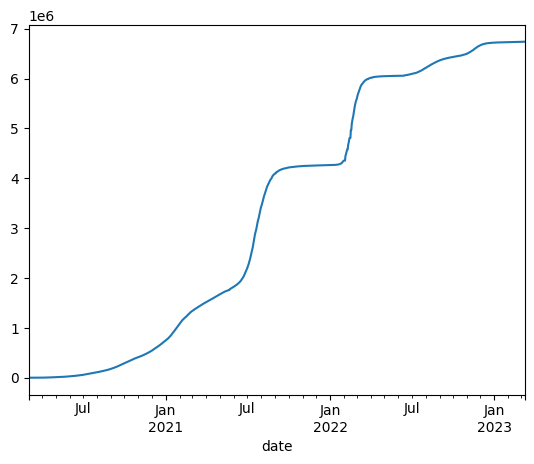

In [43]:
# Menampilkan line chart terhadap kasus covid19 di Indonesia
covid[covid['country'] == 'Indonesia'].groupby('date')['confirmed'].sum().plot()

<Axes: xlabel='date'>

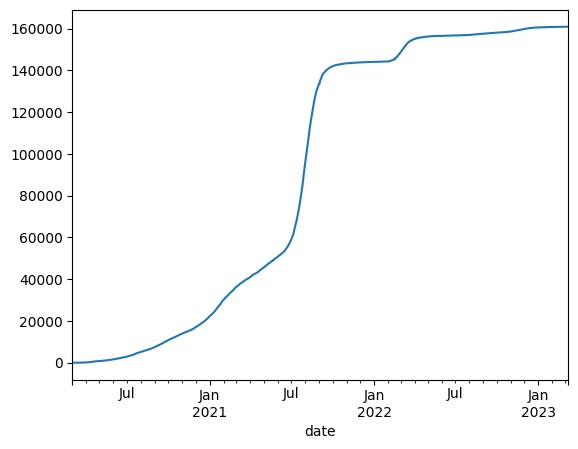

In [44]:
# Menampilkan line chart kasus kematian akibat covid19 di Indonesia
covid[covid['country'] == 'Indonesia'].groupby('date')['deaths'].sum().plot()

<ipython-input-45-dcd9e1c1c77a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid[


<Axes: xlabel='year,combined_key'>

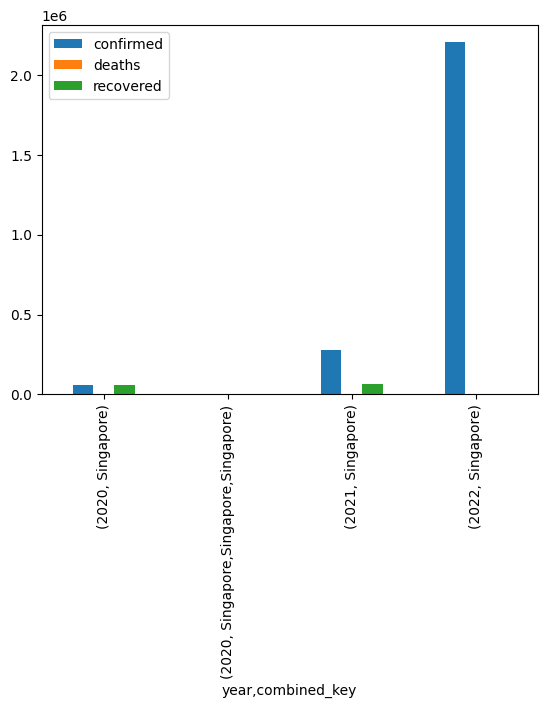

In [45]:
# Menampilkan bar chart data jumlah kasus terbanyak dari tahun 2020 - 2022 di Singapura
covid[
      (covid['country'] == 'Singapore') &
      (covid['year'] < 2023)].groupby(['year','combined_key'])['confirmed', 'deaths', 'recovered'].max().plot(kind = 'bar')


<Axes: xlabel='year,country,province_state'>

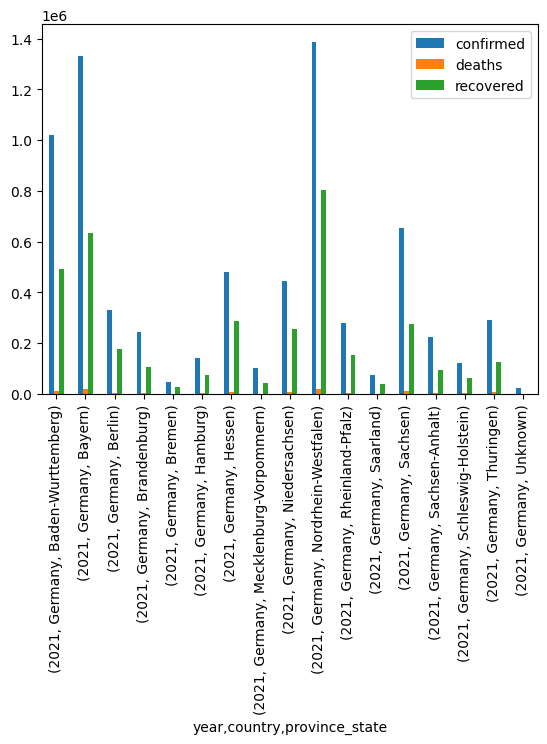

In [46]:
# Menampilkan barchart untuk dataframe covid_germany
covid_germany.plot(kind = 'bar')

<ipython-input-47-c999c0dc4025>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  covid_uk = covid[


<Axes: xlabel='year,country,province_state'>

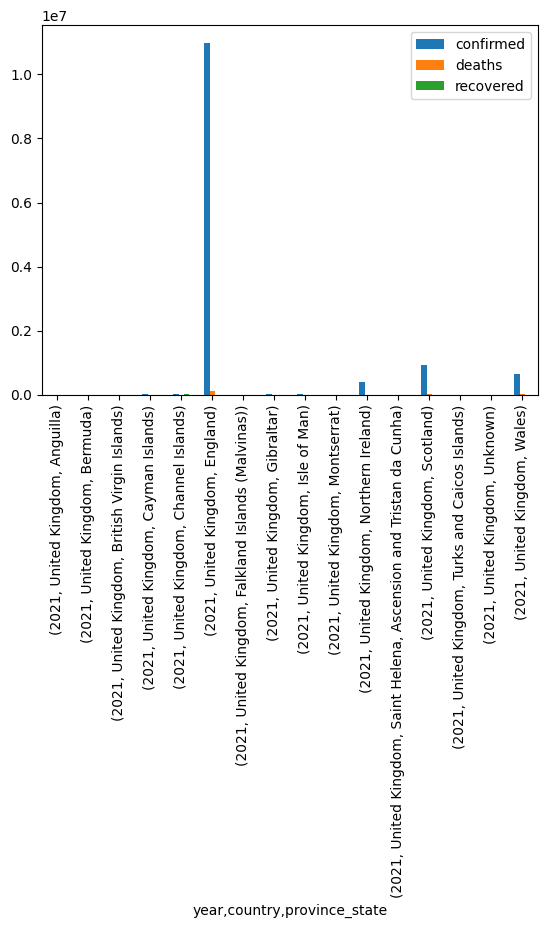

In [47]:
# Menampilkan bar chart data laporan kasus covid di Negara UK
covid_uk = covid[
                      (covid['year']  == 2021) &
                      (covid['country'] == 'United Kingdom')
                ].groupby(['year', 'country', 'province_state'])['confirmed', 'deaths', 'recovered'].max()

covid_uk.plot(kind = 'bar')

*Dapat diketahui bahwa dari data* `covid19` *Negara United Kingdom, provinsi yang paling tinggi terkena kasus* `covid19` *yakni provinsi* `England`

## **VI. Kesimpulan**

Berdasarkan data `covid19` ini dapat disimpulkan beberapa hal yakni:



1.   Negara dengan kasus `covid19` tertinggi di dunia yaitu Negara `United Kingdom`, `Prancis`, dan `Turki` dari tahun 2020-2021 sedangkan untuk negara dengan kasus `sembuh` yaitu Negara `United States` dan `India`.

2.   Negara `Indonesia` memiliki nilai kasus `covid19` yaitu `4.262.720 orang` dengan jumlah kematian `144.094 orang` sampai akhir tahun 2021. Selain itu, ditinjau dari line chart yang sudah ada, dari tahun 2020-2023 kasus covid19 dan kematian akibat covid19 di Indonesia terus meningkat

3.   Dari 3 sampel Negara di Benua Asia Tenggara (`Singapura`, `Thailand`, dan `Timor-Leste`) jumlah kasus tertinggi dan kematian berada di Negara `Thailand` dan jumlah kasus sembuh berada di Negara `Singapura`.

4.   Dari 2 sample Negara di Benua Eropa (`Germany` dan `United Kingdom`) persebaran kasus covid di Negara `Germany` cukup merata di bandingkan dengan kasus covid di Negara `United Kingdom` yang berada di provinsi `England`.



---

Catatan :
*   Kasus `covid19` dari sampel Benua Asia Tenggara disimpulkan bahwa semakin tinggi kasus `covid19` maka semakin tinggi juga angka kematian. Selain itu, kepadatan penduduk juga cukup berpengaruh terhadap jumlah kasus `covid19`.








